In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re

In [78]:
plt.style.use("seaborn-v0_8-darkgrid")
sns.set_palette("pastel")

# Data exploration

We start by exploring the raw data to assess the quality of the data set

In [79]:
raw_data = pd.read_csv("2016_Building_Energy_Benchmarking.csv")

raw_data.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


In [80]:
raw_data.shape

(3376, 46)

In [81]:
raw_data.describe()

,OSEBuildingID,DataYear,ZipCode,CouncilDistrictCode,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,...,SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),Comments,TotalGHGEmissions,GHGEmissionsIntensity
count,3376.000000,3376.0,3360.000000,3376.000000,3376.000000,3376.000000,3376.000000,3368.000000,3376.000000,3.376000e+03,...,3.371000e+03,3.370000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03,0.0,3367.000000,3367.000000
mean,21208.991114,2016.0,98116.949107,4.439277,47.624033,-122.334795,1968.573164,1.106888,4.709123,9.483354e+04,...,5.403667e+06,5.276726e+06,2.745959e+05,1.086639e+06,3.707612e+06,1.368505e+04,1.368505e+06,NaN,119.723971,1.175916
std,12223.757015,0.0,18.615205,2.120625,0.047758,0.027203,33.088156,2.108402,5.494465,2.188376e+05,...,2.161063e+07,1.593879e+07,3.912173e+06,4.352478e+06,1.485066e+07,6.709781e+04,6.709781e+06,NaN,538.832227,1.821452
min,1.000000,2016.0,98006.000000,1.000000,47.499170,-122.414250,1900.000000,0.000000,0.000000,1.128500e+04,...,0.000000e+00,0.000000e+00,0.000000e+00,-3.382680e+04,-1.154170e+05,0.000000e+00,0.000000e+00,NaN,-0.800000,-0.020000
25%,19990.750000,2016.0,98105.000000,3.000000,47.599860,-122.350662,1948.000000,1.000000,2.000000,2.848700e+04,...,9.251286e+05,9.701822e+05,0.000000e+00,1.874229e+05,6.394870e+05,0.000000e+00,0.000000e+00,NaN,9.495000,0.210000
50%,23112.000000,2016.0,98115.000000,4.000000,47.618675,-122.332495,1975.000000,1.000000,4.000000,4.417500e+04,...,1.803753e+06,1.904452e+06,0.000000e+00,3.451299e+05,1.177583e+06,3.237538e+03,3.237540e+05,NaN,33.920000,0.610000
75%,25994.250000,2016.0,98122.000000,7.000000,47.657115,-122.319407,1997.000000,1.000000,5.000000,9.099200e+04,...,4.222455e+06,4.381429e+06,0.000000e+00,8.293178e+05,2.829632e+06,1.189033e+04,1.189034e+06,NaN,93.940000,1.370000
max,50226.000000,2016.0,98272.000000,7.000000,47.733870,-122.220966,2015.000000,111.000000,99.000000,9.320156e+06,...,8.739237e+08,4.716139e+08,1.349435e+08,1.925775e+08,6.570744e+08,2.979090e+06,2.979090e+08,NaN,16870.980000,34.090000


In [82]:
raw_data.dtypes

OSEBuildingID                        int64
DataYear                             int64
BuildingType                        object
PrimaryPropertyType                 object
PropertyName                        object
Address                             object
City                                object
State                               object
ZipCode                            float64
TaxParcelIdentificationNumber       object
CouncilDistrictCode                  int64
Neighborhood                        object
Latitude                           float64
Longitude                          float64
YearBuilt                            int64
NumberofBuildings                  float64
NumberofFloors                       int64
PropertyGFATotal                     int64
PropertyGFAParking                   int64
PropertyGFABuilding(s)               int64
ListOfAllPropertyUseTypes           object
LargestPropertyUseType              object
LargestPropertyUseTypeGFA          float64
SecondLarge

In [83]:
raw_data.select_dtypes(include=["object", "bool"])

,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,TaxParcelIdentificationNumber,Neighborhood,ListOfAllPropertyUseTypes,LargestPropertyUseType,SecondLargestPropertyUseType,ThirdLargestPropertyUseType,YearsENERGYSTARCertified,DefaultData,ComplianceStatus,Outlier
0,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,0659000030,DOWNTOWN,Hotel,Hotel,NaN,NaN,NaN,False,Compliant,NaN
1,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,0659000220,DOWNTOWN,"Hotel, Parking, Restaurant",Hotel,Parking,Restaurant,NaN,False,Compliant,NaN
2,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,0659000475,DOWNTOWN,Hotel,Hotel,NaN,NaN,NaN,False,Compliant,NaN
3,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,0659000640,DOWNTOWN,Hotel,Hotel,NaN,NaN,NaN,False,Compliant,NaN
4,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,0659000970,DOWNTOWN,"Hotel, Parking, Swimming Pool",Hotel,Parking,Swimming Pool,NaN,False,Compliant,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,Nonresidential COS,Office,Horticulture building,1600 S Dakota St,Seattle,WA,1624049080,GREATER DUWAMISH,Office,Office,NaN,NaN,NaN,True,Error - Correct Default Data,NaN
3372,Nonresidential COS,Other,International district/Chinatown CC,719 8th Ave S,Seattle,WA,3558300000,DOWNTOWN,Other - Recreation,Other - Recreation,NaN,NaN,NaN,False,Compliant,NaN
3373,Nonresidential COS,Other,Queen Anne Pool,1920 1st Ave W,Seattle,WA,1794501150,MAGNOLIA / QUEEN ANNE,"Fitness Center/Health Club/Gym, Other - Recrea...",Other - Recreation,Fitness Center/Health Club/Gym,Swimming Pool,NaN,False,Compliant,NaN
3374,Nonresidential COS,Mixed Use Property,South Park Community Center,8319 8th Ave S,Seattle,WA,7883603155,GREATER DUWAMISH,"Fitness Center/Health Club/Gym, Food Service, ...",Other - Recreation,Fitness Center/Health Club/Gym,Pre-school/Daycare,NaN,False,Compliant,NaN


The data set contains 30 numerical features and 16 non numerical ones

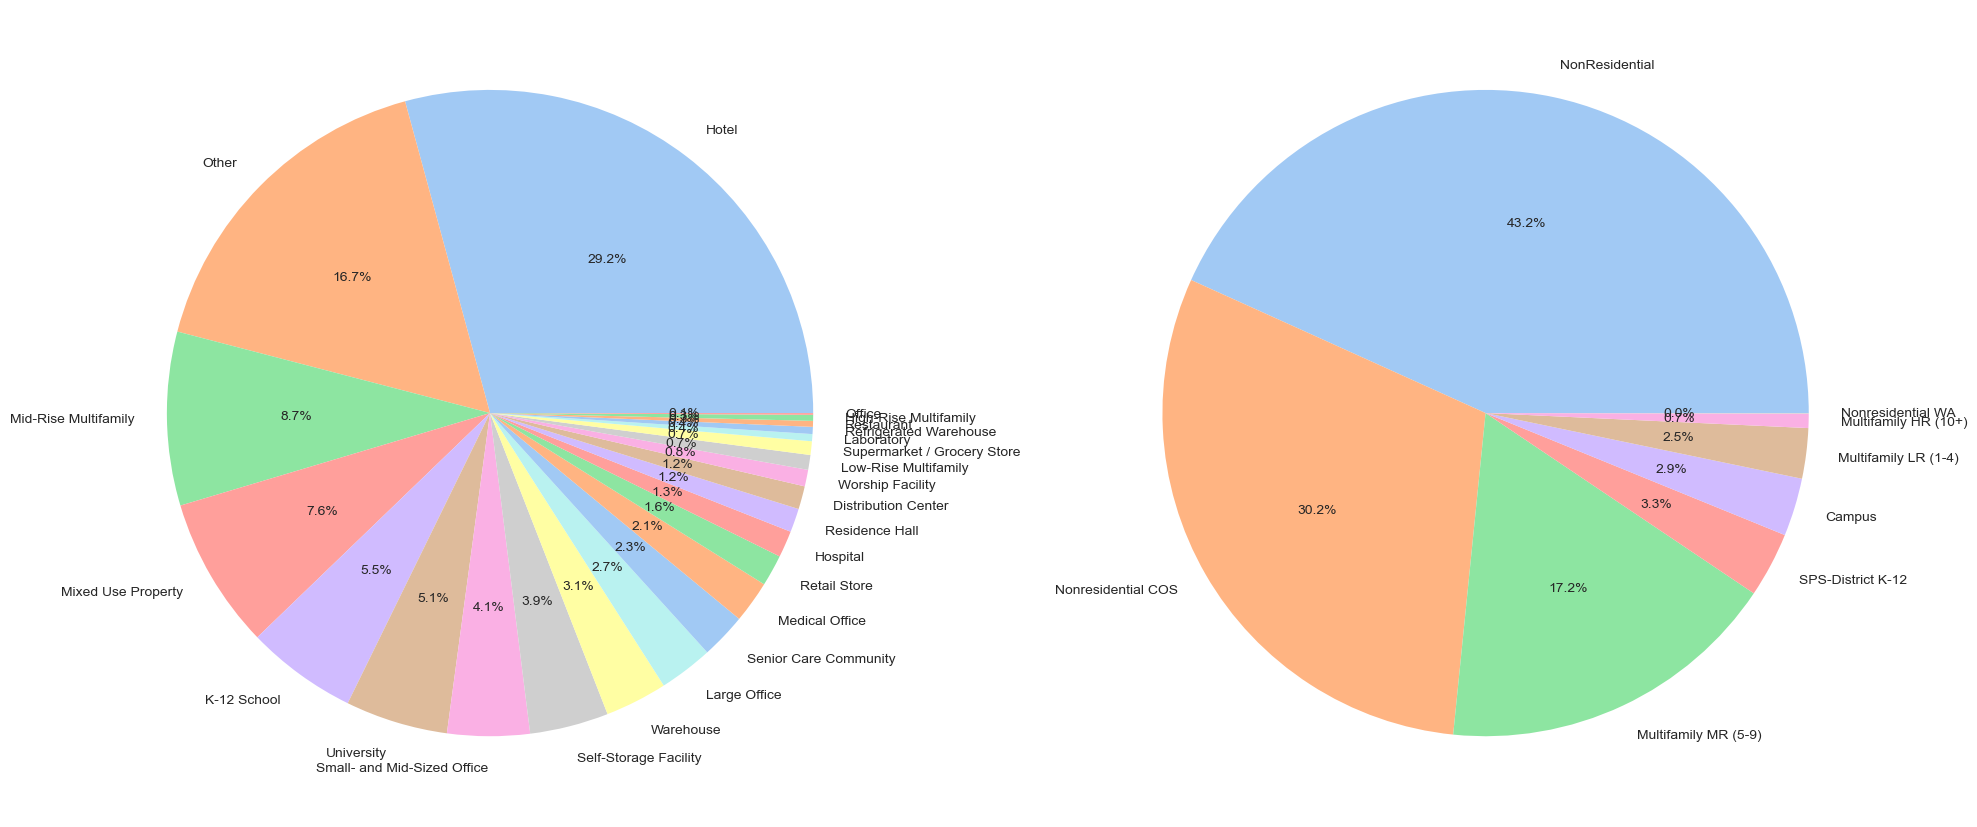

In [84]:
fig, ax = plt.subplots(1, 2, figsize=[20, 35])
ax[0].pie(
    raw_data["PrimaryPropertyType"].value_counts(),
    labels=raw_data["PrimaryPropertyType"].unique(),
    autopct="%1.1f%%",
)
ax[1].pie(
    raw_data["BuildingType"].value_counts(),
    labels=raw_data["BuildingType"].unique(),
    autopct="%1.1f%%",
)
plt.tight_layout()
plt.show()

All columns seem to have the expected type, except maybe for YearsENERGYSTARCertified 

In [85]:
raw_data["YearsENERGYSTARCertified"].unique()

array([nan, '2016', '2014', '2012', '20172015',
       '2017201620152014201320122011201020092008', '201020092007',
       '201720102007', '20162015', '20152014201220112009', '201220092008',
       '201620152014201320112010200920072000', '201620092008',
       '201620142012', '20162015201420122008',
       '2016201520142013201220112010200920082007200620052004',
       '201520142013', '2014201320112010200920082007', '2016201520142013',
       '2017201620152014201320112008', '201720162015201420132008',
       '20162015201320122010', '2015201320122010', '20162011201020092008',
       '2007', '2010', '20172016201520092008', '2017201320092008', '2015',
       '2017', '2017201120102007', '201720162014201320122011201020092007',
       '201720152014201220102008', '20092005', '2017201520142013',
       '201620152012', '2012201020072006', '20112009', '2009',
       '201620152014201320092008', '201620152014201320112009',
       '2016201520142013201220112010', '201720162012', '20102008',
       '20

In [86]:
raw_data.select_dtypes(exclude=["object", "bool"])

,OSEBuildingID,DataYear,ZipCode,CouncilDistrictCode,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,...,SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),Comments,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,98101.0,7,47.61220,-122.33799,1927,1.0,12,88434,...,7.226362e+06,7.456910e+06,2003882.00,1.156514e+06,3.946027e+06,12764.529300,1.276453e+06,NaN,249.98,2.83
1,2,2016,98101.0,7,47.61317,-122.33393,1996,1.0,11,103566,...,8.387933e+06,8.664479e+06,0.00,9.504252e+05,3.242851e+06,51450.816410,5.145082e+06,NaN,295.86,2.86
2,3,2016,98101.0,7,47.61393,-122.33810,1969,1.0,41,956110,...,7.258702e+07,7.393711e+07,21566554.00,1.451544e+07,4.952666e+07,14938.000000,1.493800e+06,NaN,2089.28,2.19
3,5,2016,98101.0,7,47.61412,-122.33664,1926,1.0,10,61320,...,6.794584e+06,6.946800e+06,2214446.25,8.115253e+05,2.768924e+06,18112.130860,1.811213e+06,NaN,286.43,4.67
4,8,2016,98121.0,7,47.61375,-122.34047,1980,1.0,18,175580,...,1.417261e+07,1.465650e+07,0.00,1.573449e+06,5.368607e+06,88039.984380,8.803998e+06,NaN,505.01,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,50222,2016,NaN,2,47.56722,-122.31154,1990,1.0,1,12294,...,8.497457e+05,9.430032e+05,0.00,1.536550e+05,5.242709e+05,3254.750244,3.254750e+05,NaN,20.94,1.70
3372,50223,2016,NaN,2,47.59625,-122.32283,2004,1.0,1,16000,...,9.502762e+05,1.053706e+06,0.00,1.162210e+05,3.965461e+05,5537.299805,5.537300e+05,NaN,32.17,2.01
3373,50224,2016,NaN,7,47.63644,-122.35784,1974,1.0,1,13157,...,5.765898e+06,6.053764e+06,0.00,5.252517e+05,1.792159e+06,39737.390630,3.973739e+06,NaN,223.54,16.99
3374,50225,2016,NaN,1,47.52832,-122.32431,1989,1.0,1,14101,...,7.194712e+05,7.828413e+05,0.00,1.022480e+05,3.488702e+05,3706.010010,3.706010e+05,NaN,22.11,1.57


In [87]:
raw_data.isna().mean().mean()

0.12847723057902327

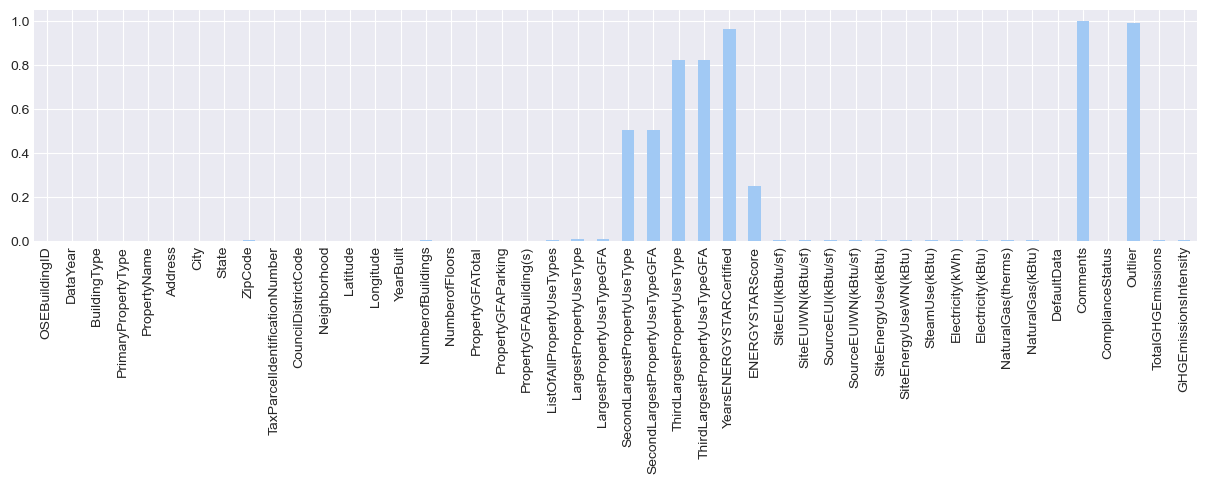

In [88]:
plt.figure(figsize=[15, 3])
raw_data.isna().mean().plot(kind="bar")
plt.show()

The first look at the data set shows that it's quite small and contains good quality data. 

The data set contains 3376 buildings caracterized by 46 features, 30 numerical and 16 non numerical features. 

The types are coherent and the 12% of missing data seems to be justified since they only concern features where the value can be null.

The data description does however seem to highlight a few outliers in some columns. 

---

## Data Cleaning

### Filtering out unecessary features and rows

We will start by removing the features that will not be usefull for the later analyses

In [89]:
raw_data.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'Address', 'City', 'State', 'ZipCode',
       'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood',
       'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'DefaultData', 'Comments', 'ComplianceStatus',
       'Outlier

In [90]:
data = raw_data.drop(
    columns=[
        "DataYear",
        "CouncilDistrictCode",
        "ZipCode",
        "Address",
        "City",
        "State",
        "TaxParcelIdentificationNumber",
        "Comments",
        "DefaultData",
        "Neighborhood",
        "GHGEmissionsIntensity",
        "SiteEnergyUseWN(kBtu)",
        "SourceEUI(kBtu/sf)",
        "SourceEUIWN(kBtu/sf)",
        "SiteEUIWN(kBtu/sf)",
        "SiteEUI(kBtu/sf)",
        "NaturalGas(therms)",
        "Electricity(kWh)",
    ]
)

data

,OSEBuildingID,BuildingType,PrimaryPropertyType,PropertyName,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,...,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),ComplianceStatus,Outlier,TotalGHGEmissions
0,1,NonResidential,Hotel,Mayflower park hotel,47.61220,-122.33799,1927,1.0,12,88434,...,NaN,NaN,60.0,7.226362e+06,2003882.00,3.946027e+06,1.276453e+06,Compliant,NaN,249.98
1,2,NonResidential,Hotel,Paramount Hotel,47.61317,-122.33393,1996,1.0,11,103566,...,4622.0,NaN,61.0,8.387933e+06,0.00,3.242851e+06,5.145082e+06,Compliant,NaN,295.86
2,3,NonResidential,Hotel,5673-The Westin Seattle,47.61393,-122.33810,1969,1.0,41,956110,...,NaN,NaN,43.0,7.258702e+07,21566554.00,4.952666e+07,1.493800e+06,Compliant,NaN,2089.28
3,5,NonResidential,Hotel,HOTEL MAX,47.61412,-122.33664,1926,1.0,10,61320,...,NaN,NaN,56.0,6.794584e+06,2214446.25,2.768924e+06,1.811213e+06,Compliant,NaN,286.43
4,8,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),47.61375,-122.34047,1980,1.0,18,175580,...,0.0,NaN,75.0,1.417261e+07,0.00,5.368607e+06,8.803998e+06,Compliant,NaN,505.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,50222,Nonresidential COS,Office,Horticulture building,47.56722,-122.31154,1990,1.0,1,12294,...,NaN,NaN,46.0,8.497457e+05,0.00,5.242709e+05,3.254750e+05,Error - Correct Default Data,NaN,20.94
3372,50223,Nonresidential COS,Other,International district/Chinatown CC,47.59625,-122.32283,2004,1.0,1,16000,...,NaN,NaN,NaN,9.502762e+05,0.00,3.965461e+05,5.537300e+05,Compliant,NaN,32.17
3373,50224,Nonresidential COS,Other,Queen Anne Pool,47.63644,-122.35784,1974,1.0,1,13157,...,0.0,NaN,NaN,5.765898e+06,0.00,1.792159e+06,3.973739e+06,Compliant,NaN,223.54
3374,50225,Nonresidential COS,Mixed Use Property,South Park Community Center,47.52832,-122.32431,1989,1.0,1,14101,...,484.0,NaN,NaN,7.194712e+05,0.00,3.488702e+05,3.706010e+05,Compliant,NaN,22.11


Check whether we have duplicated buildings:

In [91]:
data.loc[data["OSEBuildingID"].duplicated()]

,OSEBuildingID,BuildingType,PrimaryPropertyType,PropertyName,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,...,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),ComplianceStatus,Outlier,TotalGHGEmissions


The OSEBuildingID will be of no further use, we can therefore drop it.

In [92]:
data = data.drop(columns=["OSEBuildingID"])

Since we aim to predict the energy use and GHG emissions of non residential buildings, we can filter out the residential ones:

In [93]:
residential_buildings = data.loc[
    (data["BuildingType"].str.contains("Multifamily"))
    | (data["PrimaryPropertyType"].str.contains("Multifamily"))
]
residential_buildings

,BuildingType,PrimaryPropertyType,PropertyName,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,...,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),ComplianceStatus,Outlier,TotalGHGEmissions
9,Multifamily MR (5-9),Mid-Rise Multifamily,Lyon Building,47.60284,-122.33184,1910,1.0,6,63712,1496,...,NaN,NaN,1.0,4.573777e+06,1039735.188,2532015.0,1002026.0,Compliant,NaN,151.12
165,Multifamily MR (5-9),Mid-Rise Multifamily,YWCA Opportunity Place,47.61316,-122.34153,2003,1.0,7,116947,0,...,12851.0,NaN,NaN,1.004012e+07,0.000,5502627.0,4537494.0,Compliant,NaN,279.35
173,Multifamily MR (5-9),Mid-Rise Multifamily,Wintonia,47.61360,-122.32785,1909,1.0,6,51976,0,...,NaN,NaN,34.0,4.189569e+06,0.000,1673151.0,2516419.0,Compliant,NaN,145.31
188,Multifamily LR (1-4),Low-Rise Multifamily,Cooper School Artist's Lofts,47.56379,-122.36301,1917,1.0,4,56617,0,...,NaN,NaN,15.0,1.986611e+06,0.000,1191899.0,794712.0,Compliant,NaN,50.52
189,Multifamily MR (5-9),Mid-Rise Multifamily,LAKE CITY COURT,47.72232,-122.29181,2009,1.0,6,56745,0,...,NaN,NaN,54.0,2.473962e+06,0.000,1555274.0,918688.0,Compliant,NaN,59.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3353,Multifamily MR (5-9),Mid-Rise Multifamily,131910 - LIV Seattle,47.66366,-122.31450,2015,1.0,7,63825,4850,...,NaN,NaN,99.0,2.337651e+06,0.000,1503925.0,833726.0,Compliant,NaN,54.76
3354,Multifamily MR (5-9),Residence Hall,Terry Hall & Maple Hall,47.65577,-122.31702,2015,1.0,7,325000,0,...,NaN,NaN,69.0,1.646749e+07,0.000,8814581.0,7652903.0,Compliant,NaN,467.90
3355,Multifamily MR (5-9),Mid-Rise Multifamily,Raven Terrace,47.60189,-122.32182,2015,1.0,6,86045,8908,...,1369.0,NaN,84.0,2.161240e+06,0.000,2161240.0,0.0,Compliant,NaN,15.07
3357,Multifamily MR (5-9),Mid-Rise Multifamily,Broadstone Sky,47.55976,-122.38320,2015,1.0,7,208136,58818,...,NaN,NaN,100.0,3.552185e+06,0.000,1988772.0,1563413.0,Compliant,NaN,96.90


We will remove the 1711 residential buildings from the data set:

In [94]:
data.drop(residential_buildings.index, inplace=True)
data.drop(columns=["BuildingType"], inplace=True)

### Feature exploration

We can now start exploring each feature more closely: 

In [95]:
data.columns

Index(['PrimaryPropertyType', 'PropertyName', 'Latitude', 'Longitude',
       'YearBuilt', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType',
       'ThirdLargestPropertyUseTypeGFA', 'YearsENERGYSTARCertified',
       'ENERGYSTARScore', 'SiteEnergyUse(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kBtu)', 'NaturalGas(kBtu)', 'ComplianceStatus', 'Outlier',
       'TotalGHGEmissions'],
      dtype='object')

We will start with the ComplianceStatus and Outlier features since we will probably need to remove them. 

The ComplianceStatus feature indicates whether a property has met energy benchmarking requirements for the current reporting year and the Outlier indicates whether a proporty is a high or low outlier. 

In [96]:
data["ComplianceStatus"].unique()

array(['Compliant', 'Error - Correct Default Data', 'Missing Data',
       'Non-Compliant'], dtype=object)

In [97]:
non_compliant_buildings = data.loc[~data["ComplianceStatus"].isin(["Compliant"])]
compliant_buildings = data.loc[data["ComplianceStatus"].isin(["Compliant"])]
non_compliant_buildings

,PrimaryPropertyType,PropertyName,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),...,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),ComplianceStatus,Outlier,TotalGHGEmissions
22,K-12 School,Graham Hill Elementary,47.54576,-122.26853,1961,1.0,2,56228,0,56228,...,NaN,NaN,95.0,1.539478e+06,0.0,9.369550e+05,6.025230e+05,Error - Correct Default Data,NaN,38.53
28,K-12 School,Meany Building,47.62266,-122.30547,1955,1.0,1,126351,0,126351,...,NaN,NaN,NaN,0.000000e+00,0.0,0.000000e+00,0.000000e+00,Missing Data,NaN,0.00
30,K-12 School,Jane Addams Middle,47.70994,-122.29301,1949,1.0,2,160645,0,160645,...,NaN,NaN,75.0,6.779173e+06,0.0,1.947601e+06,4.831572e+06,Error - Correct Default Data,NaN,270.18
31,K-12 School,John Hay Elementary,47.63290,-122.35172,1989,1.0,2,51582,0,51582,...,NaN,NaN,NaN,0.000000e+00,0.0,1.496816e+06,0.000000e+00,Missing Data,NaN,10.43
38,K-12 School,Eckstein Middle,47.68252,-122.29498,1950,1.0,2,175565,0,175565,...,NaN,NaN,88.0,6.399128e+06,0.0,1.599684e+06,4.799443e+06,Error - Correct Default Data,NaN,266.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3152,Other,Georgetown Steamplant,47.54277,-122.31626,1906,1.0,2,39212,0,39212,...,NaN,NaN,NaN,7.237040e+04,0.0,7.237100e+04,0.000000e+00,Non-Compliant,Low outlier,0.50
3166,K-12 School,Catharine Blaine K-8,47.64342,-122.39970,1952,1.0,1,116101,0,116101,...,NaN,NaN,NaN,0.000000e+00,0.0,0.000000e+00,4.993620e+06,Missing Data,NaN,265.21
3366,Office,Central West HQ / Brown Bear,47.63572,-122.37525,1952,1.0,1,13661,0,13661,...,NaN,NaN,75.0,5.026677e+05,0.0,5.026678e+05,0.000000e+00,Error - Correct Default Data,NaN,3.50
3369,Office,Genesee/SC SE HQ,47.56440,-122.27813,1960,1.0,1,15398,0,15398,...,NaN,NaN,93.0,3.878100e+05,0.0,2.775369e+05,1.102730e+05,Error - Correct Default Data,NaN,7.79


In [98]:
energy_features = data.loc[:, "SiteEnergyUse(kBtu)":"NaturalGas(kBtu)"].columns
energy_features

Index(['SiteEnergyUse(kBtu)', 'SteamUse(kBtu)', 'Electricity(kBtu)',
       'NaturalGas(kBtu)'],
      dtype='object')

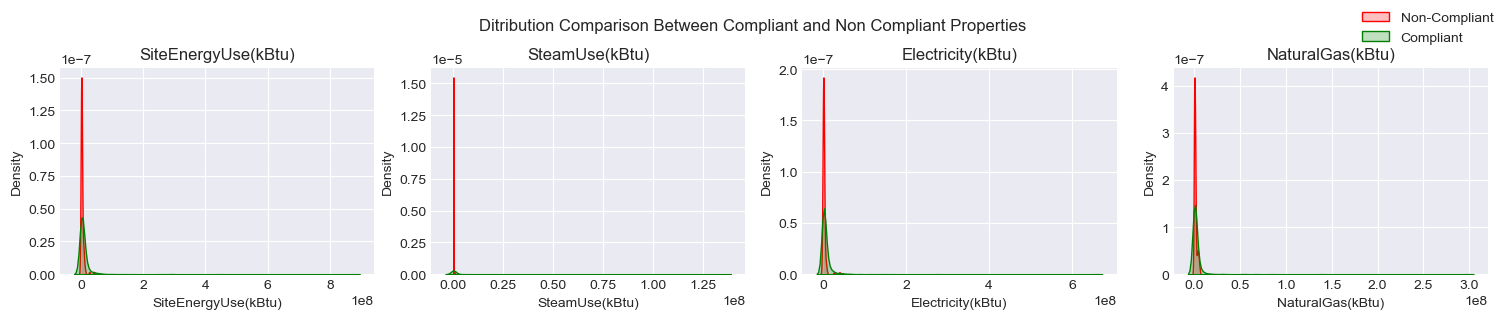

In [99]:
fig = plt.figure(figsize=(15, 8))
for i, feature in enumerate(energy_features):
    ax = plt.subplot(3, 4, i + 1)
    sns.kdeplot(
        x=non_compliant_buildings[feature],
        fill=True,
        color="red",
        label="non compliant properties",
    )
    sns.kdeplot(
        x=compliant_buildings[feature],
        fill=True,
        color="green",
        label="compliant properties",
    )
    ax.set_title(feature)
fig.legend(labels=["Non-Compliant", "Compliant"])
fig.suptitle("Ditribution Comparison Between Compliant and Non Compliant Properties")
plt.tight_layout()
plt.show()

There are big differences within the distributions of compliant and non compliant buildings. In addition non compliant buildings also contain a lot of missing data. We will therefore remove all properties that have been flagged as non compliant, and therefore as outliers.

In [100]:
data = data.drop(non_compliant_buildings.index)
data.drop(columns=["ComplianceStatus"], inplace=True)

data["Outlier"].unique()

array([nan], dtype=object)

We can drop the "Outlier" column since all outliers have been removed by the the compliance status

In [101]:
data.drop(columns=["Outlier"], inplace=True)

### Identifying outliers

In [102]:
data.select_dtypes(exclude=["object", "bool"]).describe()

,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions
count,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1.546000e+03,1546.000000,1.546000e+03,1.542000e+03,841.000000,347.000000,996.000000,1.546000e+03,1.546000e+03,1.546000e+03,1.546000e+03,1546.000000
mean,47.616472,-122.333513,1961.631953,1.179172,4.277490,1.213994e+05,13836.898448,1.075625e+05,1.000015e+05,36373.279782,15031.542936,63.667671,8.867785e+06,5.518961e+05,6.145212e+06,2.040770e+06,193.825776
std,0.046977,0.023278,32.889927,3.041181,6.784999,3.064857e+05,43745.031804,2.928095e+05,2.856797e+05,66664.811355,37085.481296,28.822329,3.132518e+07,5.722168e+06,2.152426e+07,9.716705e+06,779.586028
min,47.509590,-122.411820,1900.000000,0.000000,0.000000,1.128500e+04,0.000000,3.636000e+03,5.656000e+03,0.000000,0.000000,1.000000,5.713320e+04,0.000000e+00,-1.154170e+05,0.000000e+00,-0.800000
25%,47.587825,-122.343093,1930.000000,1.000000,1.000000,2.884175e+04,0.000000,2.793425e+04,2.503975e+04,5561.000000,2613.500000,44.000000,1.248602e+06,0.000000e+00,7.300348e+05,0.000000e+00,20.645000
50%,47.612710,-122.333160,1965.500000,1.000000,2.000000,4.815900e+04,0.000000,4.608400e+04,4.204300e+04,12102.000000,6000.000000,71.000000,2.732167e+06,0.000000e+00,1.743362e+06,4.906580e+05,49.940000
75%,47.649080,-122.322660,1989.000000,1.000000,4.000000,1.078405e+05,0.000000,9.585275e+04,9.209825e+04,31845.000000,12990.000000,88.000000,7.301812e+06,0.000000e+00,5.265868e+06,1.531061e+06,147.402500
max,47.733870,-122.261800,2015.000000,111.000000,99.000000,9.320156e+06,512608.000000,9.320156e+06,9.320156e+06,639931.000000,459748.000000,100.000000,8.739237e+08,1.349435e+08,6.570744e+08,2.979090e+08,16870.980000


The features NumberofBuildings and NumberofFloors seem to contain outliers

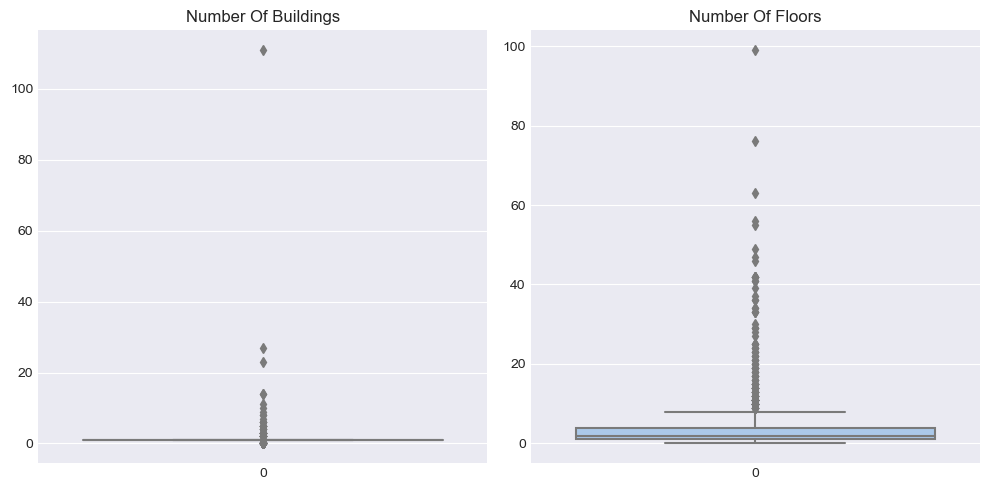

In [103]:
fig, ax = plt.subplots(1, 2, figsize=[10, 5])
sns.boxplot(data=data["NumberofBuildings"], ax=ax[0])
sns.boxplot(data=data["NumberofFloors"], ax=ax[1])
ax[0].set_title("Number Of Buildings")
ax[1].set_title("Number Of Floors")
plt.tight_layout()
plt.show()

In [104]:
data.loc[(data["NumberofBuildings"] == 0) | (data["NumberofBuildings"] > 111)]

,PrimaryPropertyType,PropertyName,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),...,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions
63,Medical Office,Polyclinic North && South,47.612440,-122.321400,1965,0.0,3,179014,0,179014,...,NaN,NaN,NaN,NaN,48.0,1.670106e+07,0.000000e+00,9886484.0,6814570.0,430.84
76,Small- and Mid-Sized Office,KCTS9,47.623910,-122.348370,1986,0.0,2,66240,2352,63888,...,5181.0,Distribution Center,4551.0,NaN,NaN,4.166306e+06,0.000000e+00,4166305.0,0.0,29.04
160,Warehouse,Harbor Island: Warehouse E - DNRP-SWD,47.575070,-122.357470,1916,0.0,4,79600,0,79600,...,NaN,NaN,NaN,NaN,34.0,2.411402e+06,0.000000e+00,2411402.0,0.0,16.81
201,Large Office,Cox Media Group Seattle KIRO TV (322),47.617570,-122.351220,1968,0.0,3,100734,26731,74003,...,NaN,NaN,NaN,NaN,20.0,9.788717e+06,0.000000e+00,9788716.0,0.0,68.24
241,Small- and Mid-Sized Office,University District Office Buiding,47.661000,-122.316260,1961,0.0,5,99005,0,99005,...,NaN,NaN,NaN,NaN,70.0,4.728488e+06,0.000000e+00,2863212.0,1865277.0,119.03
264,Mixed Use Property,Thaw Building,47.528710,-122.294430,1970,0.0,1,88400,0,88400,...,29620.0,Distribution Center,27715.0,NaN,42.0,4.383100e+06,0.000000e+00,2530658.0,1852442.0,116.03
278,Large Office,Fourth and Pike Building,47.610050,-122.336100,1926,0.0,10,132326,0,132326,...,12610.0,Retail Store,9835.0,NaN,72.0,6.029020e+06,3.282471e+05,5698221.0,2551.0,65.20
280,Hotel,Motif Seattle,47.609960,-122.335720,1973,0.0,19,332067,59280,272787,...,NaN,NaN,NaN,NaN,6.0,3.778555e+07,1.558601e+07,19800542.0,2398995.0,1468.50
291,Other,Meridian (East),47.611850,-122.334210,1996,0.0,4,267335,166960,100375,...,69947.0,Other - Restaurant/Bar,27400.0,NaN,NaN,7.273156e+06,0.000000e+00,5169902.0,2103253.0,147.75
358,Other,Westbridge,47.565480,-122.353780,1955,0.0,1,113780,0,113780,...,22248.0,NaN,NaN,NaN,NaN,3.574542e+06,0.000000e+00,1470885.0,2103657.0,121.98


NumberofBuildings should not contain any 0, we will therefore replace them with 1, and we will remove the University of Washington - Seattle Campus as it is a very big outlier for both the PropertyGFATotal and the NumberofBuildings

In [105]:
data.loc[data["NumberofBuildings"] == 0, "NumberofBuildings"] = 1
data = data.drop(index=3274)

In [106]:
data.loc[data["NumberofBuildings"].isna()]

,PrimaryPropertyType,PropertyName,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),...,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions


The same observation can be made for NumberOfFloors, as in the US the ground floor is considered as the first floor, there should therefore be no buildings with 0 floors. 

In [107]:
buildings_wo_floors = data.loc[(data["NumberofFloors"] == 0)]
buildings_wo_floors

,PrimaryPropertyType,PropertyName,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),...,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions
166,Hotel,Grand Hyatt Seattle,47.61275,-122.33330,1999,1.0,0,934292,0,934292,...,438756.0,Restaurant,49700.0,NaN,NaN,65047284.00,0.0,39364114.0,25683162.0,1638.46
487,Medical Office,Arnold Pavilion,47.60979,-122.32298,2004,1.0,0,225982,0,225982,...,NaN,NaN,NaN,NaN,53.0,20560622.00,7815663.0,12744957.0,0.0,692.12
488,Mixed Use Property,2200 Westlake - SEDO,47.61783,-122.33729,2006,1.0,0,516407,0,516407,...,340236.0,Hotel,67627.0,NaN,31.0,39403320.00,0.0,29432803.0,9970512.0,734.72
564,Other,Pacific Place,47.61289,-122.33531,1999,1.0,0,947987,0,947987,...,100000.0,Restaurant,80000.0,NaN,NaN,46510960.00,0.0,46510954.0,0.0,324.25
1754,Medical Office,HART First Hill LLC,47.60862,-122.32372,1945,1.0,0,274568,0,274568,...,135954.0,NaN,NaN,NaN,52.0,25311526.00,13296249.0,12015275.0,0.0,1110.07
1993,Other,(ID#24086)Campus1:KC Metro Transit Atlantic Ce...,47.59042,-122.32498,1991,10.0,0,230971,0,230971,...,0.0,NaN,NaN,NaN,NaN,21022288.00,0.0,15419770.0,5602515.0,405.05
3130,Warehouse,Sandpoint #5,47.68454,-122.26235,1940,1.0,0,384772,0,384772,...,63872.0,NaN,NaN,NaN,69.0,15206762.00,0.0,9014872.0,6191888.0,391.70
3131,Medical Office,Sandpoint #25,47.68240,-122.26223,1960,1.0,0,30287,0,30287,...,NaN,NaN,NaN,NaN,32.0,2193115.00,0.0,1815405.0,377710.0,32.72
3132,Small- and Mid-Sized Office,Sandpoint #29,47.68254,-122.26299,1960,1.0,0,21931,0,21931,...,31845.0,NaN,NaN,NaN,32.0,3947209.25,0.0,1398591.0,2548619.0,145.11
3168,Other,Magnuson,47.68212,-122.26330,1929,8.0,0,502030,0,502030,...,NaN,NaN,NaN,NaN,NaN,18470340.00,0.0,9359884.0,9110455.0,549.11


It is unlikely that these buildings have 1 floor, we will therefore replace with the median number of floor by PrimaryPropertyType:

In [108]:
buildings_wo_floors_category = buildings_wo_floors["PrimaryPropertyType"].values

for category in buildings_wo_floors_category:
    category_median = data.loc[data["PrimaryPropertyType"] == category][
        "NumberofFloors"
    ].median()
    data.loc[
        (data["NumberofFloors"] == 0) & (data["PrimaryPropertyType"] == category),
        "NumberofFloors",
    ] = category_median

We can now check the large outliers :

In [109]:
data.loc[data["NumberofFloors"] > 60]

,PrimaryPropertyType,PropertyName,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),...,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions
233,Large Office,Seattle Municipal Tower (2030),47.60501,-122.32988,1990,1.0,63,1354987,159600,1195387,...,159599.0,Other,18656.0,2014201320112010200920082007,89.0,6.157618e+07,0.0,61576180.0,0.0,429.27
559,Large Office,Columbia Center - 2015,47.60454,-122.33072,1985,1.0,76,1952220,319400,1632820,...,319368.0,NaN,NaN,2017201620152012200920072006,86.0,9.293764e+07,0.0,87851862.0,5085763.0,882.56
1359,Worship Facility,Seattle Chinese Baptist Church,47.55072,-122.30265,1977,1.0,99,21948,0,21948,...,NaN,NaN,NaN,NaN,80.0,3.260012e+05,0.0,326001.0,0.0,2.27


Seattle Municipal Tower (2030) is actually still at concept level, the values are therefore predictions, we will therefore drop this building. 

The Baptist Church actually only contains 2 floors, we will therefore correct the value:

In [110]:
data = data.drop(index=233)

data.loc[1359, "NumberofFloors"] = 2

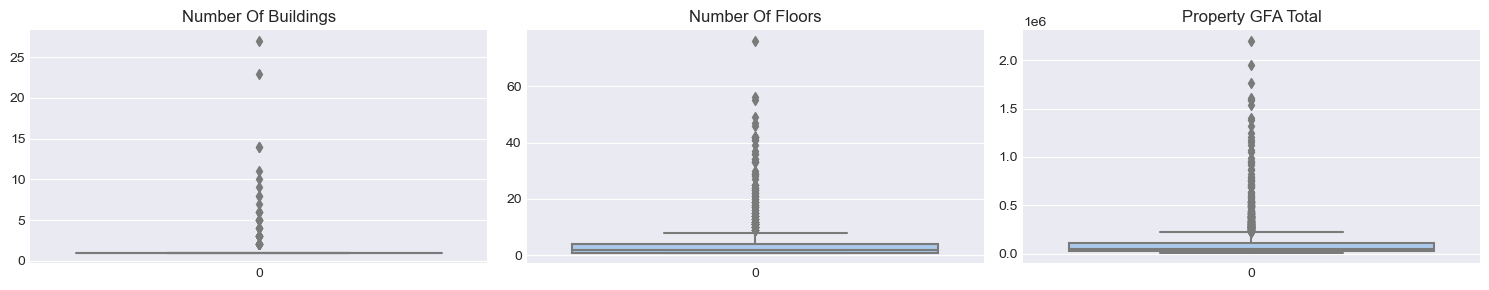

In [111]:
fig, ax = plt.subplots(1, 3, figsize=[15, 3])
sns.boxplot(data=data["NumberofBuildings"], ax=ax[0])
sns.boxplot(data=data["NumberofFloors"], ax=ax[1])
sns.boxplot(data=data["PropertyGFATotal"], ax=ax[2])
ax[0].set_title("Number Of Buildings")
ax[1].set_title("Number Of Floors")
ax[2].set_title("Property GFA Total")
plt.tight_layout()
plt.show()

We can now check whether some totals are incoherent 

In [112]:
data.loc[
    data["PropertyGFATotal"]
    != (data["PropertyGFAParking"] + data["PropertyGFABuilding(s)"])
]

,PrimaryPropertyType,PropertyName,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),...,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions


In [113]:
tolerance_percentage = 10
total_energy_columns = ["Electricity(kBtu)", "NaturalGas(kBtu)", "SteamUse(kBtu)"]


def get_error_percentage():
    return (
        abs(
            round(data["SiteEnergyUse(kBtu)"])
            - round(data[total_energy_columns].sum(axis=1))
        )
        / round(data["SiteEnergyUse(kBtu)"])
        * 100
    )


erroneous_energy_total = data.loc[get_error_percentage() > tolerance_percentage]

erroneous_energy_total["ErrorPercentage"] = get_error_percentage()[
    get_error_percentage() > tolerance_percentage
]

erroneous_energy_total

/var/folders/ht/r34_b3vj4p7c88ck54235g_40000gn/T/ipykernel_37396/2867303514.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  erroneous_energy_total["ErrorPercentage"] = get_error_percentage()[


,PrimaryPropertyType,PropertyName,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),...,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,ErrorPercentage
69,Other,Key Arena,47.62208,-122.35398,1962,1.0,1,389000,0,389000,...,NaN,NaN,NaN,NaN,2.365898e+07,6093150.0,14419146.0,688680.0,607.41,10.389299
71,Other,Armory,47.62208,-122.35398,1938,1.0,5,396085,0,396085,...,NaN,NaN,NaN,NaN,2.095503e+07,9763690.0,7252325.0,0.0,804.20,18.797452
75,Other,McCaw Hall,47.62395,-122.35143,1928,1.0,2,262048,0,262048,...,NaN,NaN,NaN,NaN,2.072325e+07,5137220.0,13512686.0,0.0,490.73,10.004908
403,Large Office,Alley24,47.62029,-122.33078,2005,1.0,6,336700,124800,211900,...,Retail Store,0.0,NaN,95.0,9.058916e+06,0.0,7877393.0,0.0,54.92,13.042653
513,Supermarket / Grocery Store,IUC- Whole Foods Interbay,47.63718,-122.37734,2008,1.0,1,57176,0,57176,...,"Personal Services (Health/Beauty, Dry Cleaning...",5500.0,NaN,31.0,1.252517e+07,0.0,0.0,0.0,0.00,100.000000
563,Large Office,Market Place I & II-2003 Western Avenue,47.61051,-122.34439,1979,1.0,7,131143,87160,43983,...,NaN,NaN,NaN,93.0,5.177270e+06,0.0,4871126.0,1416041.0,109.16,21.437881
601,Small- and Mid-Sized Office,200 SW Michigan,47.54103,-122.33766,1929,1.0,3,85126,0,85126,...,NaN,NaN,NaN,1.0,3.795171e+07,0.0,18610055.0,685132.0,166.13,49.158581
1280,Other,Seattle Children's Theatre,47.62082,-122.35251,1992,1.0,2,40600,0,40600,...,NaN,NaN,NaN,NaN,2.485521e+06,137900.0,1509514.0,374537.0,41.06,18.650818
2037,Small- and Mid-Sized Office,Lamar Advertising Company,47.57075,-122.32724,1962,1.0,1,28800,0,28800,...,NaN,NaN,NaN,73.0,2.107744e+06,0.0,786547.0,1028822.0,60.12,13.871466
2441,Small- and Mid-Sized Office,Buttnick City Loan,47.60071,-122.33377,1909,1.0,3,47215,0,47215,...,NaN,NaN,NaN,58.0,2.092696e+06,0.0,1597575.0,991813.0,63.81,23.734551


We can drop the properties with 100% error rate since we don't know what type or percentage of energy source is used. 

In [114]:
data.drop(index=513, inplace=True)

Now we can identify which properties have a total energy use that is outside of a normal range compared to similar properties

In [115]:
for index, property in erroneous_energy_total.iterrows():
    property_type = property["PrimaryPropertyType"]
    gfa_total = property["PropertyGFATotal"]
    site_energy_use = property["SiteEnergyUse(kBtu)"]

    similar_properties = data.loc[
        (data["PrimaryPropertyType"] == property_type)
        & (data["PropertyGFATotal"] > (gfa_total - 5000))
        & (data["PropertyGFATotal"] < (gfa_total + 5000))
    ]

    q1 = similar_properties["SiteEnergyUse(kBtu)"].quantile(0.25)
    q3 = similar_properties["SiteEnergyUse(kBtu)"].quantile(0.75)
    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    actual_total_is_within_iqr = lower_bound <= site_energy_use <= upper_bound
    if not actual_total_is_within_iqr:
        print(f"Property {index}: Actual Total Outside IQR")

Property 601: Actual Total Outside IQR


Since the SiteEnergyUse for all but one property seems to be within the normal range compared to similar properties, and since we will not be using the actual values of the Electricity, Steam and Gas use, we will therefore choose the keep the original SiteEnergyUse values as is. 

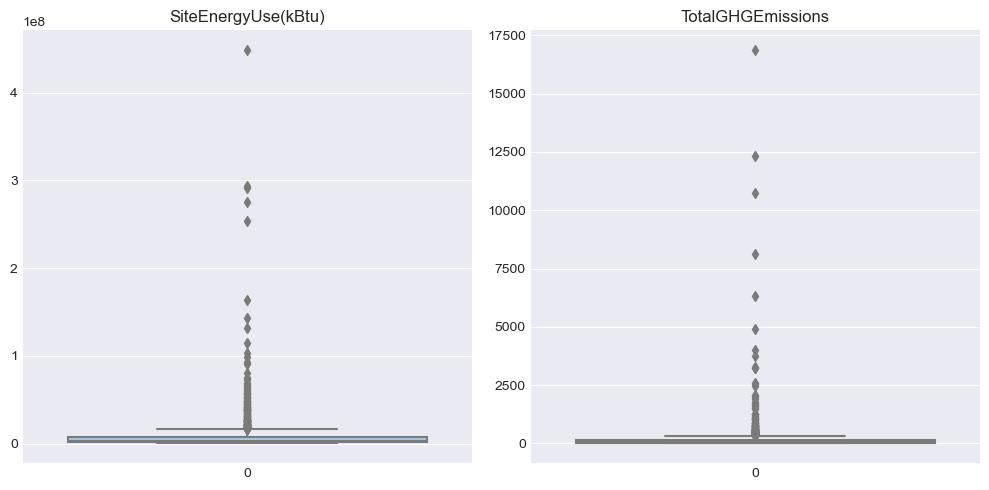

In [116]:
fig, ax = plt.subplots(1, 2, figsize=[10, 5])
sns.boxplot(data=data["SiteEnergyUse(kBtu)"], ax=ax[0])
ax[0].set_title("SiteEnergyUse(kBtu)")
sns.boxplot(data=data["TotalGHGEmissions"], ax=ax[1])
ax[1].set_title("TotalGHGEmissions")
plt.tight_layout()
plt.show()

In [117]:
energy_use_outliers = data.loc[
    data["SiteEnergyUse(kBtu)"] > 2e8,
    ["PropertyGFATotal", "PrimaryPropertyType", "SiteEnergyUse(kBtu)"],
].sort_values(by="PropertyGFATotal", ascending=False)

energy_use_outliers

,PropertyGFATotal,PrimaryPropertyType,SiteEnergyUse(kBtu)
618,1765970,Hospital,291614432.0
170,1158691,Hospital,293090784.0
124,879000,Hospital,253832464.0
35,494835,Mixed Use Property,448385312.0
558,429405,Other,274682208.0


These outliers, mostly hospitals, will be removed from the data set used for further analysis

In [118]:
data.drop(energy_use_outliers.index, inplace=True)

### Handling missing values

All buildings have at least one type of use, we will try to fill in the missing values for these features

In [119]:
null_sum = data.isna().sum()
null_sum[null_sum > 0]

LargestPropertyUseType                4
LargestPropertyUseTypeGFA             4
SecondLargestPropertyUseType        703
SecondLargestPropertyUseTypeGFA     703
ThirdLargestPropertyUseType        1194
ThirdLargestPropertyUseTypeGFA     1194
YearsENERGYSTARCertified           1442
ENERGYSTARScore                     549
dtype: int64

In [120]:
data.loc[
    data["LargestPropertyUseType"].isna(),
    :"ThirdLargestPropertyUseTypeGFA",
]

,PrimaryPropertyType,PropertyName,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA
353,Self-Storage Facility,Market St Center,47.66838,-122.39310,1946,2.0,2,111445,0,111445,"Fitness Center/Health Club/Gym, Office, Other ...",NaN,NaN,NaN,NaN,NaN,NaN
1147,Hotel,Palladian Hotel,47.61203,-122.34165,1910,1.0,8,61721,0,61721,Hotel,NaN,NaN,NaN,NaN,NaN,NaN
2414,Small- and Mid-Sized Office,Talon Northlake LLC,47.64747,-122.34086,2008,1.0,4,48350,0,48350,Office,NaN,NaN,NaN,NaN,NaN,NaN
2459,Restaurant,BUSH GARDEN - RESTURANT & LOUNGE,47.59697,-122.32474,1913,1.0,3,28800,0,28800,Restaurant,NaN,NaN,NaN,NaN,NaN,NaN


In [121]:
data.loc[353, "ListOfAllPropertyUseTypes"]

'Fitness Center/Health Club/Gym, Office, Other - Education, Other - Recreation, Other - Restaurant/Bar, Outpatient Rehabilitation/Physical Therapy, Personal Services (Health/Beauty, Dry Cleaning, etc), Restaurant, Retail Store, Self-Storage Facility, Vocat'

This property seem to have too many very different usages types, for only 2 buildings with 2 floors. We will remove it from the dataset

In [122]:
data.drop(index=353, inplace=True)

For the other properties, we can fill in the missing values based on the list of property use since they only have one.

In [123]:
missing_property_use_type = data.loc[
    data["LargestPropertyUseType"].isna(),
    :"ThirdLargestPropertyUseTypeGFA",
]

data.loc[missing_property_use_type.index, "LargestPropertyUseType"] = data[
    "ListOfAllPropertyUseTypes"
]
data.loc[missing_property_use_type.index, "LargestPropertyUseTypeGFA"] = data[
    "PropertyGFATotal"
]

We can replace null values of second and third property use type/GFA for buildings that have only one type of use:

In [124]:
data.loc[
    data["SecondLargestPropertyUseType"].isna(), "SecondLargestPropertyUseType"
] = "None"
data.loc[
    data["ThirdLargestPropertyUseType"].isna(), "ThirdLargestPropertyUseType"
] = "None"
data.loc[
    data["SecondLargestPropertyUseTypeGFA"].isna(), "SecondLargestPropertyUseTypeGFA"
] = 0
data.loc[
    data["ThirdLargestPropertyUseTypeGFA"].isna(), "ThirdLargestPropertyUseTypeGFA"
] = 0

In [125]:
data.columns[data.isna().any()]

Index(['YearsENERGYSTARCertified', 'ENERGYSTARScore'], dtype='object')

## Feature Engineering

We will exploit some of the features to create new ones that can be exploited for further analyses.

We can start by calculating the percentage of usage of each energy source:

In [126]:
def calculate_percentage(column_name, total_column_name):
    return round(data[column_name] / data[total_column_name] * 100, 2)


data["ElectricityUse(Percentage)"] = calculate_percentage(
    "Electricity(kBtu)", "SiteEnergyUse(kBtu)"
)

data["SteamUse(Percentage)"] = calculate_percentage(
    "SteamUse(kBtu)", "SiteEnergyUse(kBtu)"
)

data["NaturalGasUse(Percentage)"] = calculate_percentage(
    "NaturalGas(kBtu)", "SiteEnergyUse(kBtu)"
)

In [127]:
buildings_wo_energy_use = data.loc[
    data["SteamUse(Percentage)"].isna()
    | data["ElectricityUse(Percentage)"].isna()
    | data["NaturalGasUse(Percentage)"].isna()
]

buildings_wo_energy_use

,PrimaryPropertyType,PropertyName,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),...,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,ElectricityUse(Percentage),SteamUse(Percentage),NaturalGasUse(Percentage)


We can do the same thing for the GFA of buildings with several uses:

In [128]:
data["LargestUseTypeGFA(Percentage)"] = calculate_percentage(
    "LargestPropertyUseTypeGFA", "PropertyGFATotal"
)
data["SecondLargestUseTypeGFA(Percentage)"] = calculate_percentage(
    "SecondLargestPropertyUseTypeGFA", "PropertyGFATotal"
)
data["ThirdLargestUseTypeGFA(Percentage)"] = calculate_percentage(
    "ThirdLargestPropertyUseTypeGFA", "PropertyGFATotal"
)
data["ParkingGFA(Percentage)"] = calculate_percentage(
    "PropertyGFAParking", "PropertyGFATotal"
)

In [129]:
data

,PrimaryPropertyType,PropertyName,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),...,Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,ElectricityUse(Percentage),SteamUse(Percentage),NaturalGasUse(Percentage),LargestUseTypeGFA(Percentage),SecondLargestUseTypeGFA(Percentage),ThirdLargestUseTypeGFA(Percentage),ParkingGFA(Percentage)
0,Hotel,Mayflower park hotel,47.61220,-122.33799,1927,1.0,12,88434,0,88434,...,3.946027e+06,1.276453e+06,249.98,54.61,27.73,17.66,100.00,0.00,0.00,0.00
1,Hotel,Paramount Hotel,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,...,3.242851e+06,5.145082e+06,295.86,38.66,0.00,61.34,80.99,14.55,4.46,14.55
2,Hotel,5673-The Westin Seattle,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,...,4.952666e+07,1.493800e+06,2089.28,68.23,29.71,2.06,79.12,0.00,0.00,20.57
3,Hotel,HOTEL MAX,47.61412,-122.33664,1926,1.0,10,61320,0,61320,...,2.768924e+06,1.811213e+06,286.43,40.75,32.59,26.66,100.00,0.00,0.00,0.00
4,Hotel,WARWICK SEATTLE HOTEL (ID8),47.61375,-122.34047,1980,1.0,18,175580,62000,113580,...,5.368607e+06,8.803998e+06,505.01,37.88,0.00,62.12,70.31,38.73,0.00,35.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3370,Other,High Point Community Center,47.54067,-122.37441,1982,1.0,1,18261,0,18261,...,6.323620e+05,2.997200e+05,20.33,67.84,0.00,32.16,100.00,0.00,0.00,0.00
3372,Other,International district/Chinatown CC,47.59625,-122.32283,2004,1.0,1,16000,0,16000,...,3.965461e+05,5.537300e+05,32.17,41.73,0.00,58.27,100.00,0.00,0.00,0.00
3373,Other,Queen Anne Pool,47.63644,-122.35784,1974,1.0,1,13157,0,13157,...,1.792159e+06,3.973739e+06,223.54,31.08,0.00,68.92,57.63,42.37,0.00,0.00
3374,Mixed Use Property,South Park Community Center,47.52832,-122.32431,1989,1.0,1,14101,0,14101,...,3.488702e+05,3.706010e+05,22.11,48.49,0.00,51.51,46.81,46.10,3.43,0.00


We can add a feature to count the number of years a building has obtained the EnergyStar Certification

In [130]:
data["NumberOfYearsENERGYSTARCertified"] = data["YearsENERGYSTARCertified"].apply(
    lambda x: len(x) / 4 if isinstance(x, str) else 0
)

data.loc[
    data["YearsENERGYSTARCertified"].isnull(), "NumberOfYearsENERGYSTARCertified"
] = 0

<Axes: >

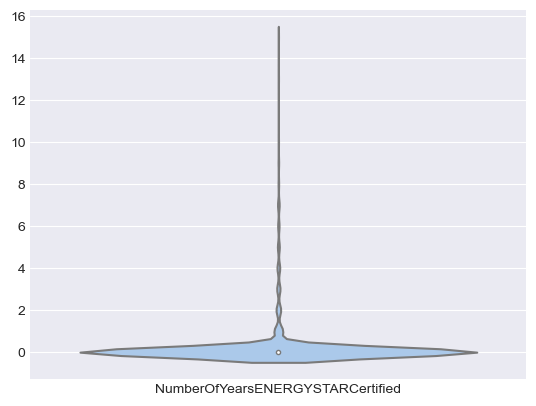

In [131]:
sns.violinplot(data[["NumberOfYearsENERGYSTARCertified"]])

We can calculate the age of a building from its construction year:

In [132]:
data["BuildingAge"] = 2016 - data["YearBuilt"]

data["BuildingAge"].describe()

count    1537.000000
mean       54.439167
std        32.878431
min         1.000000
25%        28.000000
50%        51.000000
75%        86.000000
max       116.000000
Name: BuildingAge, dtype: float64

We can count the number of uses each building has

In [133]:
def get_unique_property_uses():
    all_building_uses = set()

    for use_string in data["ListOfAllPropertyUseTypes"]:
        uses = re.split(r",\s*(?![^()]*\))", use_string)
        all_building_uses.update(uses)
    return all_building_uses


def count_property_uses(data):
    data["NumberOfPropertyUses"] = data["ListOfAllPropertyUseTypes"].apply(
        lambda use_string: sum(
            1
            for use in re.split(r",\s*(?![^()]*\))", use_string)
            if use in get_unique_property_uses()
        )
    )

    return data


data = count_property_uses(data)

data[["ListOfAllPropertyUseTypes", "NumberOfPropertyUses"]]

,ListOfAllPropertyUseTypes,NumberOfPropertyUses
0,Hotel,1
1,"Hotel, Parking, Restaurant",3
2,Hotel,1
3,Hotel,1
4,"Hotel, Parking, Swimming Pool",3
...,...,...
3370,Other - Recreation,1
3372,Other - Recreation,1
3373,"Fitness Center/Health Club/Gym, Other - Recrea...",3
3374,"Fitness Center/Health Club/Gym, Food Service, ...",5


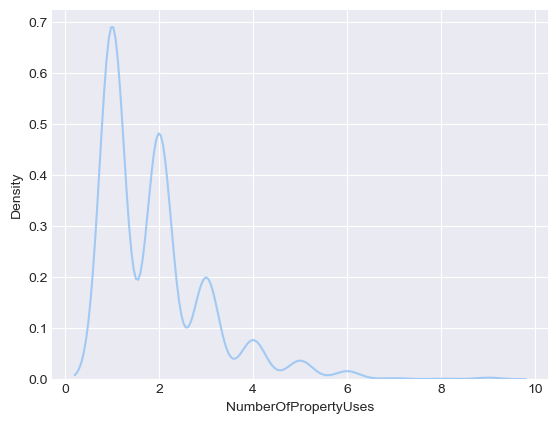

In [134]:
sns.kdeplot(data["NumberOfPropertyUses"])
plt.show()

In order to exploit the types of use, we can reduce the number of categories to 5: 
- Medical Facility
- School
- Leisure
- Service Facility
- Store

In [135]:
get_unique_property_uses()

{'Adult Education',
 'Automobile Dealership',
 'Bank Branch',
 'Bar/Nightclub',
 'College/University',
 'Convenience Store without Gas Station',
 'Courthouse',
 'Data Center',
 'Distribution Center',
 'Enclosed Mall',
 'Fast Food Restaurant',
 'Financial Office',
 'Fire Station',
 'Fitness Center/Health Club/Gym',
 'Food Sales',
 'Food Service',
 'Hospital (General Medical & Surgical)',
 'Hotel',
 'K-12 School',
 'Laboratory',
 'Library',
 'Lifestyle Center',
 'Manufacturing/Industrial Plant',
 'Medical Office',
 'Movie Theater',
 'Multifamily Housing',
 'Museum',
 'Non-Refrigerated Warehouse',
 'Office',
 'Other',
 'Other - Education',
 'Other - Entertainment/Public Assembly',
 'Other - Lodging/Residential',
 'Other - Mall',
 'Other - Public Services',
 'Other - Recreation',
 'Other - Restaurant/Bar',
 'Other - Services',
 'Other - Technology/Science',
 'Other - Utility',
 'Other/Specialty Hospital',
 'Outpatient Rehabilitation/Physical Therapy',
 'Parking',
 'Performing Arts',
 'Pers

In [136]:
general_uses = {
    "Adult Education": "School",
    "College/University": "School",
    "K-12 School": "School",
    "Other - Education": "School",
    "Other - Technology/Science": "School",
    "Pre-school/Daycare": "School",
    "Vocational School": "School",
    "University": "School",
    "Bank Branch": "ServiceFacility",
    "Courthouse": "ServiceFacility",
    "Data Center": "ServiceFacility",
    "Distribution Center": "ServiceFacility",
    "Financial Office": "ServiceFacility",
    "Fitness Center/Health Club/Gym": "ServiceFacility",
    "Fire Station": "ServiceFacility",
    "Library": "ServiceFacility",
    "Lifestyle Center": "ServiceFacility",
    "Manufacturing/Industrial Plant": "ServiceFacility",
    "Non-Refrigerated Warehouse": "ServiceFacility",
    "Office": "ServiceFacility",
    "Other": "ServiceFacility",
    "Other - Public Services": "ServiceFacility",
    "Other - Services": "ServiceFacility",
    "Other - Utility": "ServiceFacility",
    "Parking": "ServiceFacility",
    "Performing Arts": "ServiceFacility",
    "Personal Services (Health/Beauty, Dry Cleaning, etc)": "ServiceFacility",
    "Police Station": "ServiceFacility",
    "Prison/Incarceration": "ServiceFacility",
    "Refrigerated Warehouse": "ServiceFacility",
    "Repair Services (Vehicle, Shoe, Locksmith, etc)": "ServiceFacility",
    "Self-Storage Facility": "ServiceFacility",
    "Worship Facility": "ServiceFacility",
    "Mixed Use Property": "ServiceFacility",
    "Small- and Mid-Sized Office": "ServiceFacility",
    "Warehouse": "ServiceFacility",
    "Large Office": "ServiceFacility",
    "Medical Office": "MedicalFacility",
    "Laboratory": "MedicalFacility",
    "Hospital (General Medical & Surgical)": "MedicalFacility",
    "Other/Specialty Hospital": "MedicalFacility",
    "Outpatient Rehabilitation/Physical Therapy": "MedicalFacility",
    "Urgent Care/Clinic/Other Outpatient": "MedicalFacility",
    "Hospital": "MedicalFacility",
    "Residence Hall": "Leisure",
    "Movie Theater": "Leisure",
    "Museum": "Leisure",
    "Other - Entertainment/Public Assembly": "Leisure",
    "Swimming Pool": "Leisure",
    "Other - Recreation": "Leisure",
    "Bar/Nightclub": "Leisure",
    "Fast Food Restaurant": "Leisure",
    "Food Service": "Leisure",
    "Hotel": "Leisure",
    "Multifamily Housing": "Leisure",
    "Other - Restaurant/Bar": "Leisure",
    "Other - Lodging/Residential": "Leisure",
    "Residence Hall/Dormitory": "Leisure",
    "Residential Care Facility": "Leisure",
    "Restaurant": "Leisure",
    "Senior Care Community": "Leisure",
    "Single Family Home": "Leisure",
    "Social/Meeting Hall": "Leisure",
    "Automobile Dealership": "Store",
    "Convenience Store without Gas Station": "Store",
    "Enclosed Mall": "Store",
    "Food Sales": "Store",
    "Other - Mall": "Store",
    "Retail Store": "Store",
    "Strip Mall": "Store",
    "Supermarket/Grocery Store": "Store",
    "Wholesale Club/Supercenter": "Store",
    "Supermarket / Grocery Store": "Store",
}

features_to_replace = [
    "PrimaryPropertyType",
    "LargestPropertyUseType",
    "SecondLargestPropertyUseType",
    "ThirdLargestPropertyUseType",
]

for feature in features_to_replace:
    data[feature] = data[feature].replace(general_uses)

data[
    [
        "PrimaryPropertyType",
        "LargestPropertyUseType",
        "ListOfAllPropertyUseTypes",
        "SecondLargestPropertyUseType",
        "ThirdLargestPropertyUseType",
    ]
]

,PrimaryPropertyType,LargestPropertyUseType,ListOfAllPropertyUseTypes,SecondLargestPropertyUseType,ThirdLargestPropertyUseType
0,Leisure,Leisure,Hotel,None,None
1,Leisure,Leisure,"Hotel, Parking, Restaurant",ServiceFacility,Leisure
2,Leisure,Leisure,Hotel,None,None
3,Leisure,Leisure,Hotel,None,None
4,Leisure,Leisure,"Hotel, Parking, Swimming Pool",ServiceFacility,Leisure
...,...,...,...,...,...
3370,ServiceFacility,Leisure,Other - Recreation,None,None
3372,ServiceFacility,Leisure,Other - Recreation,None,None
3373,ServiceFacility,Leisure,"Fitness Center/Health Club/Gym, Other - Recrea...",ServiceFacility,Leisure
3374,ServiceFacility,Leisure,"Fitness Center/Health Club/Gym, Food Service, ...",ServiceFacility,School


We can now remove all features that won't be of any further use

In [137]:
columns_to_remove = [
    "SteamUse(kBtu)",
    "Electricity(kBtu)",
    "NaturalGas(kBtu)",
    "YearsENERGYSTARCertified",
    "YearBuilt",
    "ListOfAllPropertyUseTypes",
    "PropertyName",
    "LargestPropertyUseTypeGFA",
    "SecondLargestPropertyUseTypeGFA",
    "ThirdLargestPropertyUseTypeGFA",
    "PropertyGFAParking",
    "PropertyGFABuilding(s)",
    "ENERGYSTARScore",
]

data = data.drop(columns=columns_to_remove)

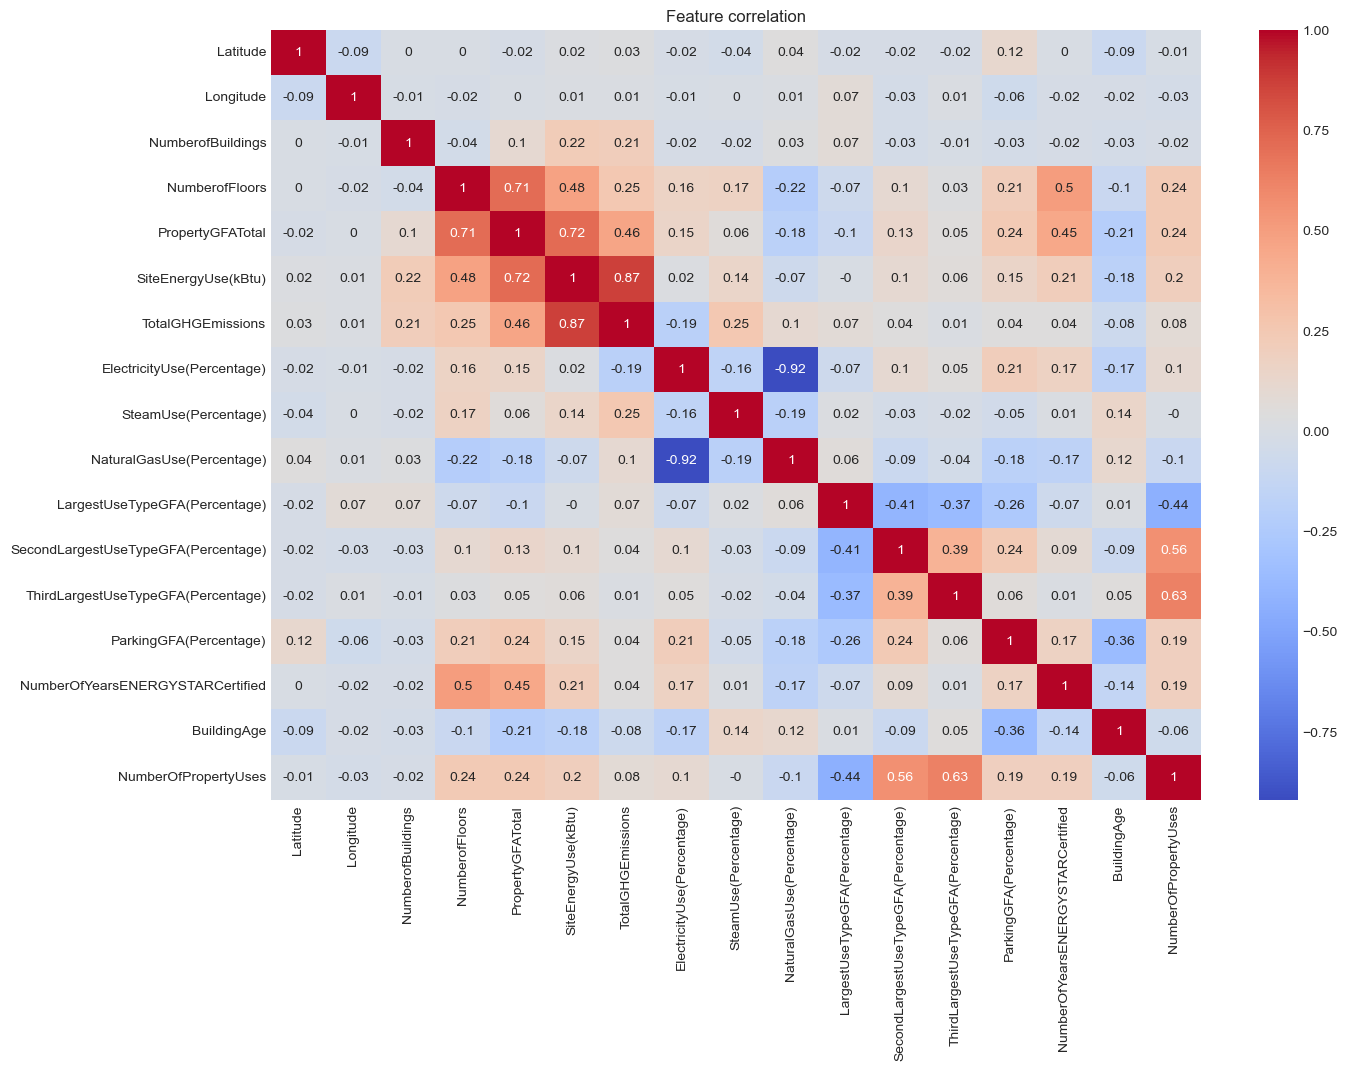

In [138]:
plt.figure(figsize=[15, 10])
sns.heatmap(
    data.corr(numeric_only=True).round(2),
    cmap="coolwarm",
    annot=True,
)
plt.title("Feature correlation")
plt.show()

There are no major correlations between the remaining features, we will therefore be able to proceed to building the predictive model.

We can check the distributions of our numerical variables 

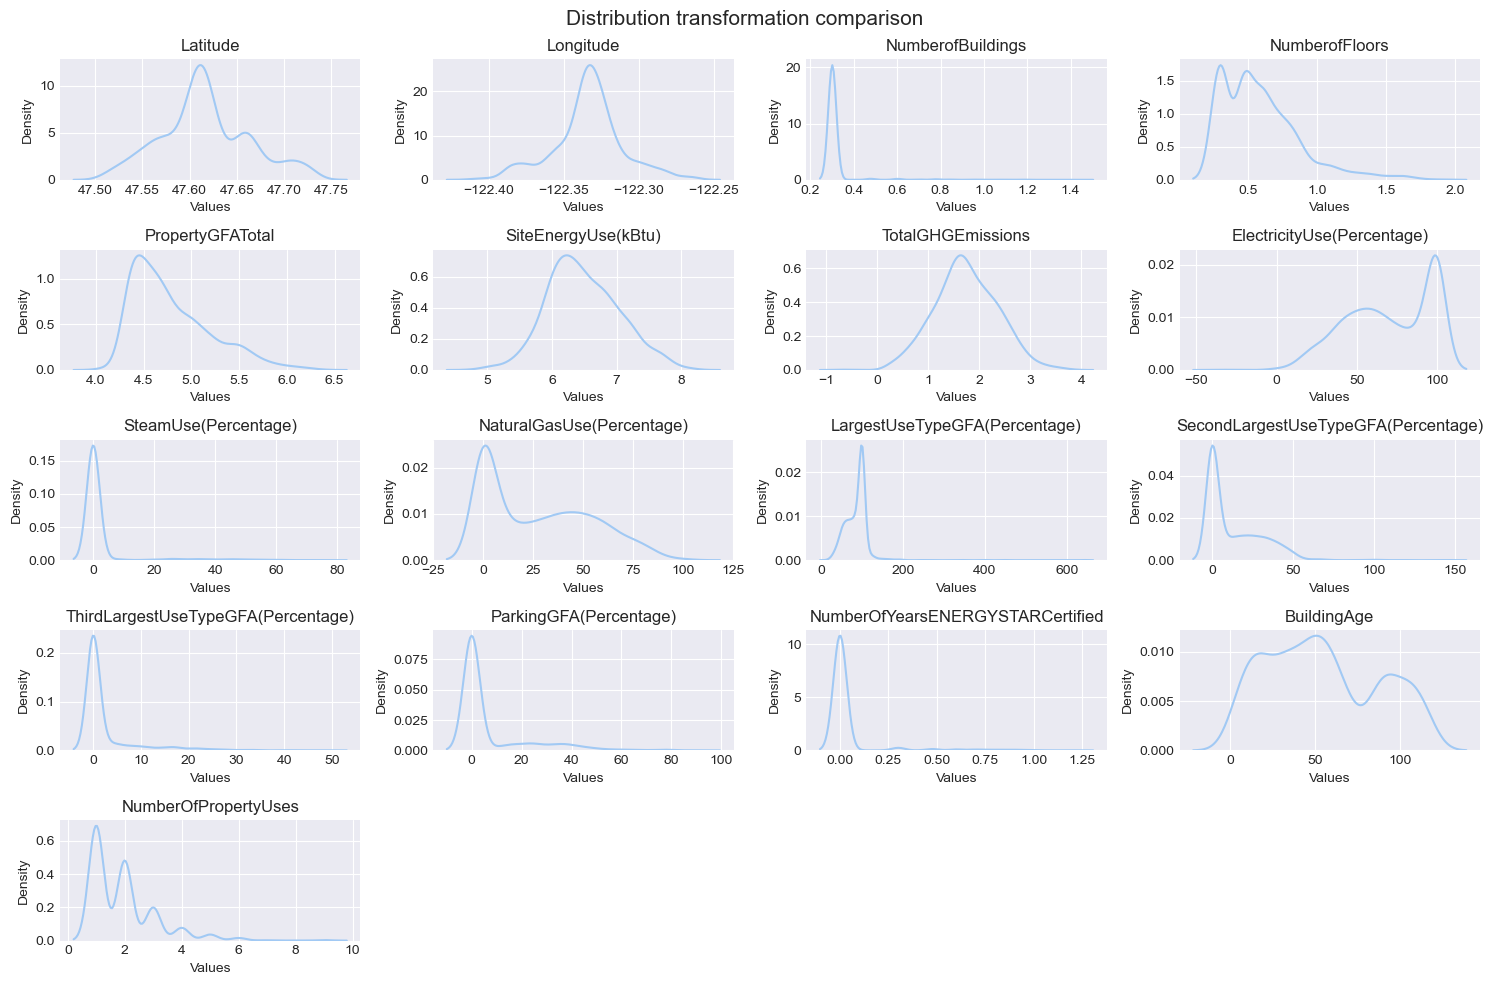

In [147]:
def kde_plots():
    columns = data.select_dtypes(include=["number"]).columns
    n_cols = 4
    n_rows = (len(columns) + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, 4, figsize=(15, 10))
    for i, column in enumerate(columns):
        row_idx = i // n_cols
        col_idx = i % n_cols
        ax = axes[row_idx, col_idx]

        sns.kdeplot(data[column], ax=ax)

        ax.set_title(f"{column}")
        ax.set_xlabel("Values")
        ax.set_ylabel("Density")

    if i + 1 < n_rows * n_cols:
        for j in range(i + 1, n_rows * n_cols):
            axes.flat[j].set_visible(False)

    fig.suptitle("Distribution transformation comparison", fontsize=15)
    plt.tight_layout()
    plt.show()


kde_plots()

We will take the log of highly skewed distributions in order to reduce the impact of extreme values. 

Since there is no risk of data leakage, this operation can be performed before splitting the data into train and test sets

In [145]:
skewed_features = [
    "SiteEnergyUse(kBtu)",
    "TotalGHGEmissions",
    "NumberofBuildings",
    "NumberofFloors",
    "PropertyGFATotal",
    "NumberOfYearsENERGYSTARCertified",
]
data[skewed_features]

,SiteEnergyUse(kBtu),TotalGHGEmissions,NumberofBuildings,NumberofFloors,PropertyGFATotal,NumberOfYearsENERGYSTARCertified
0,6.858920,2.399639,0.30103,1.113943,4.946624,0.0
1,6.923655,2.472552,0.30103,1.079181,5.015221,0.0
2,7.860859,3.320204,0.30103,1.623249,5.980508,0.0
3,6.832163,2.458532,0.30103,1.041393,4.787609,0.0
4,7.151450,2.704159,0.30103,1.278754,5.244478,0.0
...,...,...,...,...,...,...
3370,5.969455,1.328991,0.30103,0.301030,4.261548,0.0
3372,5.977850,1.520745,0.30103,0.301030,4.204147,0.0
3373,6.760867,2.351294,0.30103,0.301030,4.119190,0.0
3374,5.857014,1.363800,0.30103,0.301030,4.149281,0.0


In [141]:
data[skewed_features] = np.log10(data[skewed_features] + 1)

In [142]:
data[skewed_features]

,SiteEnergyUse(kBtu),TotalGHGEmissions,NumberofBuildings,NumberofFloors,PropertyGFATotal,NumberOfYearsENERGYSTARCertified
0,6.858920,2.399639,0.30103,1.113943,4.946624,0.0
1,6.923655,2.472552,0.30103,1.079181,5.015221,0.0
2,7.860859,3.320204,0.30103,1.623249,5.980508,0.0
3,6.832163,2.458532,0.30103,1.041393,4.787609,0.0
4,7.151450,2.704159,0.30103,1.278754,5.244478,0.0
...,...,...,...,...,...,...
3370,5.969455,1.328991,0.30103,0.301030,4.261548,0.0
3372,5.977850,1.520745,0.30103,0.301030,4.204147,0.0
3373,6.760867,2.351294,0.30103,0.301030,4.119190,0.0
3374,5.857014,1.363800,0.30103,0.301030,4.149281,0.0


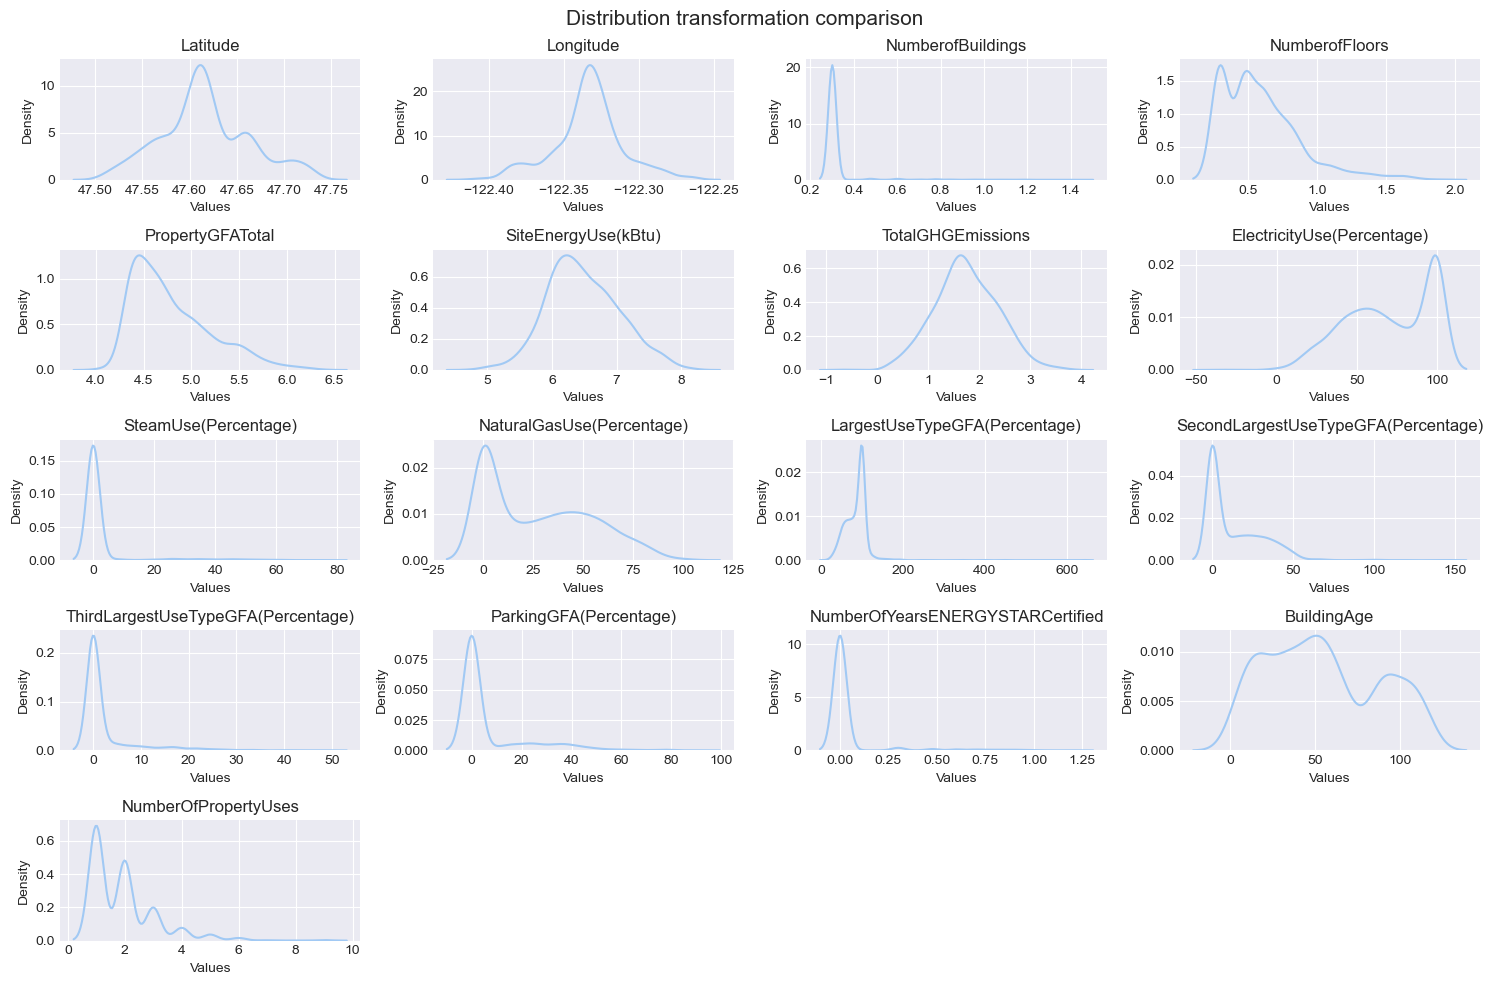

In [148]:
kde_plots()

In [144]:
data.to_csv("clean_data.csv")